In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_informative=2,
                           random_state=42)

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
class LogisticRegressionNAG:
    def __init__(self, momentum = 0.9, learning_rate = 0.1, epochs = 1000):
        self.learning_rate = learning_rate
        self.gamma = momentum 
        self.epochs = epochs 

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def initialize(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0 
        self.v_w = np.zeros(n_features)
        self.v_b = 0

    def compute_loss(self, y, y_pred):
        epsilon = 1e-8
        return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize(n_features)
        self.losses = []

        for epoch in range(self.epochs):
            # Lookahead 
            w_lookahead = self.weights + self.gamma * self.v_w
            b_lookahead = self.bias + self.gamma * self.v_b

            # Prediction from lookahead 
            linear_output = np.dot(X, w_lookahead) + b_lookahead
            y_pred = self.sigmoid(linear_output)

            # Gradients at lookahead 
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)

            # Update Velocities 
            self.v_w = self.gamma * self.v_w - self.learning_rate * dw 
            self.v_b = self.gamma * self.v_b - self.learning_rate * db 

            # Update Parameters 
            self.weights += self.v_w
            self.bias += self.v_b

            # Store Loss 
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epochs {epoch}, Loss: {loss:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias) 
    
    def predict(self, X):
        return self.predict_proba(X) >= 0.5 

In [24]:
model = LogisticRegressionNAG(learning_rate=0.1, momentum=0.9, epochs=1000)
model.fit(X_train, y_train)

Epochs 0, Loss: 0.6931
Epochs 100, Loss: 0.3427
Epochs 200, Loss: 0.3427
Epochs 300, Loss: 0.3427
Epochs 400, Loss: 0.3427
Epochs 500, Loss: 0.3427
Epochs 600, Loss: 0.3427
Epochs 700, Loss: 0.3427
Epochs 800, Loss: 0.3427
Epochs 900, Loss: 0.3427


In [25]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.88


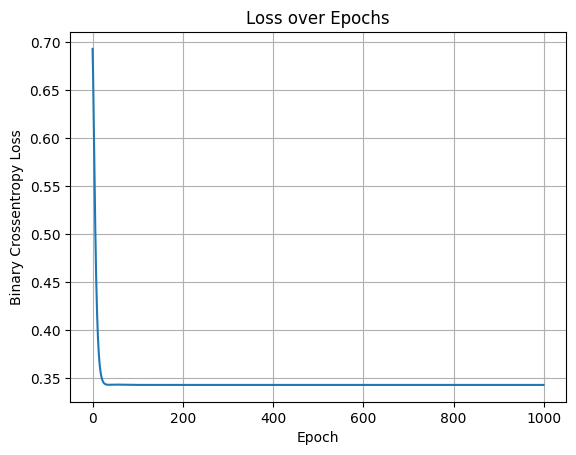

In [26]:
plt.plot(model.losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.grid(True)
plt.show()